In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

## Credit Delinquency Dataset

This dataset contains information related to credit delinquency. Here's a brief description of the columns:

- **SeriousDlqin2yrs**: A binary variable indicating whether a person experienced 90 days past due delinquency or worse. 
- **MonthlyIncome**: The monthly income of the individual.
- **NumberOfDependents**: The number of dependents in the family, excluding the individual (spouse, children, etc.).
- **Age**: The age of the borrower in years.
- **DebtRatio**: Monthly debt payments, alimony, living costs divided by monthly gross income.
- **RevolvingUtilizationOfUnsecuredLines**: The total balance on credit cards and personal lines of credit (excluding real estate and installment debt like car loans) divided by the sum of credit limits.
- **NumberRealEstateLoansOrLines**: The number of mortgage and real estate loans, including home equity lines of credit.
- **NumberOfOpenCreditLinesAndLoans**: The number of open loans (installment loans like car loans or mortgages) and lines of credit (e.g., credit cards).
- **NumberOfTime30-59DaysPastDueNotWorse**: The number of times a borrower has been 30-59 days past due but no worse in the last 2 years.
- **NumberOfTime60-89DaysPastDueNotWorse**: The number of times a borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfTimes90DaysLate**: The number of times a borrower has been 90 days or more past due.

This dataset can provide insights into credit risk and delinquency patterns among borrowers.


## Let's Explore The Data

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train.shape

(150000, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Column SeriousDlqin2yrs is empty in provided test data

#### Let's look at missing data in training dataset

In [6]:
null = pd.DataFrame(train.isnull().sum(),columns=["Null Values"])
null["% Missing Values"] = (train.isna().sum()/len(train)*100)
null = null[null["% Missing Values"] > 0]
missing_training = null.sort_values('% Missing Values', ascending=False)

In [7]:
missing_training

,Null Values,% Missing Values
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000


#### MonthlyIncome and NumberOfDependents Columns are missing values in both training dataset

### Let's Draw Corelation heatmap

In [8]:
feat_corr = pd.DataFrame(train).corr()
corr_df = feat_corr.where(np.triu(np.ones(feat_corr.shape), k = 1).astype(np.bool_))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df['Correlation'] = abs(corr_df['Correlation'])
matrix = corr_df.sort_values(by = 'Correlation', ascending = False)
max_corr = matrix[matrix['Correlation'] > 0.75]
max_corr

,Feature A,Feature B,Correlation
128,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,0.99
124,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,0.99
100,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,0.98


Features like NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, and NumberOfTime60-89DaysPastDueNotWorse show a strong negative correlation with "SeriousDlqin2yrs." This is reasonable because individuals who frequently fail to make payments on time may have financial issues that lead to an inability to pay.

The "Age" feature has the highest positive correlation, indicating that as a client's age increases, they are less likely to default on their loans.

The high correlation of 0.99 between the three features NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, and NumberOfTime60-89DaysPastDueNotWorse is expected since each borrower goes through these stages based on how many days they are late on their payments.

Deciding which model's to train and test depends on correlations. As we have to train model which smoothens underwritting process for personal loans

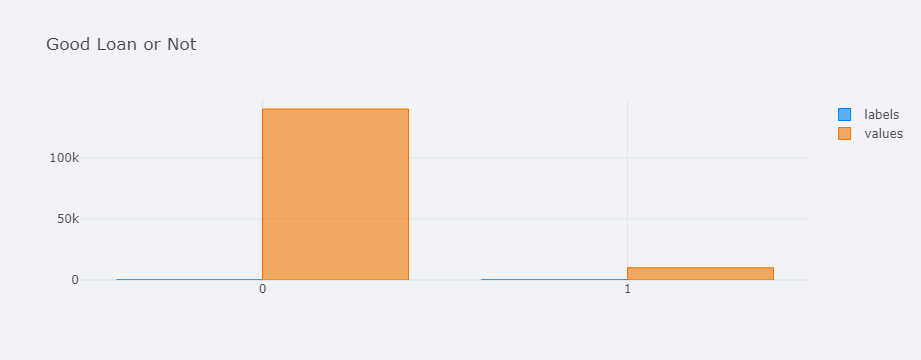

In [78]:
import cufflinks as cf
cf.go_offline()

cf.set_config_file(theme='polar')
contract_val = train['SeriousDlqin2yrs'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='bar',labels='labels',values='values', title='Good Loan or Not', hole = 0.6)

/tmp/ipykernel_294/389991162.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_294/389991162.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




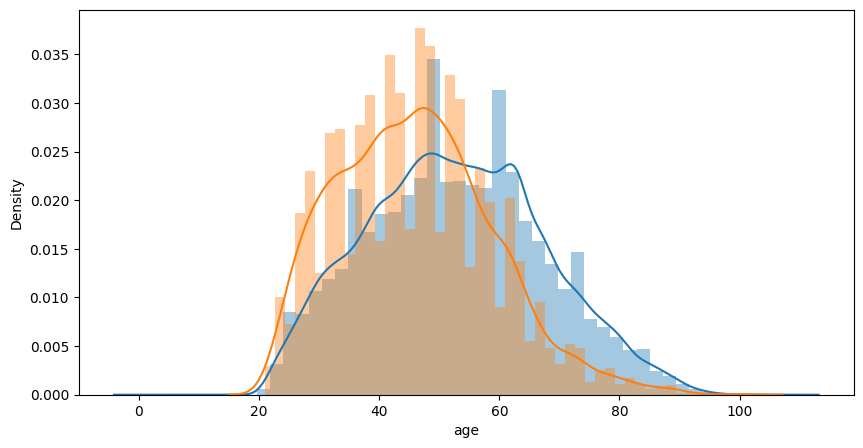

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.distplot(train.loc[train['SeriousDlqin2yrs'] == 0, 'age'], label='Mampu Melunasi')
sns.distplot(train.loc[train['SeriousDlqin2yrs'] == 1, 'age'], label='gagal bayar')

plt.show()

### Let's design preprocessor

In [11]:
train = train.drop(['Unnamed: 0'],axis=1)

In [12]:
X = train.drop(columns=['SeriousDlqin2yrs'],axis=1)
y = train['SeriousDlqin2yrs']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X_train.select_dtypes(include=['int','float']).columns.tolist()

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120000, 10), (120000,), (30000, 10), (30000,))

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_scaler = StandardScaler()
categorical_encoder = OneHotEncoder()

In [17]:
from sklearn.pipeline import Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', numerical_scaler)
])

categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('encoder', categorical_encoder)
])

In [18]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_columns),  
        ('cat', categorical_transformer, categorical_columns)  
])

### Let's train Logistic Regression Model first

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500,class_weight='balanced',solver='liblinear')

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr),
])
pipeline_lr.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    solver='liblinear'))])

In [20]:
y_pred_lr = pipeline_lr.predict(X_test)

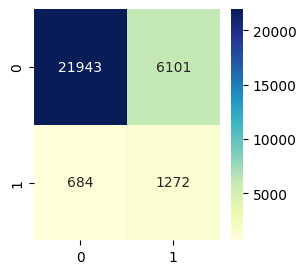

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     28044
           1       0.17      0.65      0.27      1956

    accuracy                           0.77     30000
   macro avg       0.57      0.72      0.57     30000
weighted avg       0.92      0.77      0.83     30000



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_lr,target_names=["0","1"])
print(cr)

In [22]:
from sklearn.metrics import roc_auc_score
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:, 1])))

ROC AUC: 0.790


In [23]:
import pickle
model_file_path = 'logistic_regressoin_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_lr, model_file)

##### ROC AUC for Logistic Regression model is 0.790. Which is good but not acceptable for our buisiness requirement

### Let's try and train One Class SVM

In [24]:
from sklearn.svm import OneClassSVM
SVM_model = OneClassSVM(nu=0.05)
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVM_model),
])
pipeline_svm.fit(X_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_svm[y_pred_svm == -1] = 1
y_pred_svm[y_pred_svm == 1] = 0

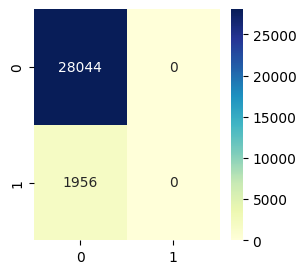

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     28044
           1       0.00      0.00      0.00      1956

    accuracy                           0.93     30000
   macro avg       0.47      0.50      0.48     30000
weighted avg       0.87      0.93      0.90     30000



/home/wanda/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/wanda/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/wanda/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_svm,target_names=["0","1"])
print(cr)

In [29]:
import pickle
model_file_path = 'one_class_svm_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_svm, model_file)

#### Let's train and test iforest model

In [30]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.1)
pipeline_iforest = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', isolation_forest)  
])

In [31]:
pipeline_iforest.fit(X_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model', IsolationForest(contamination=0.1))])

In [32]:
y_pred_iforest = pipeline_iforest.predict(X_test)

In [33]:
y_pred_iforest[y_pred_iforest == -1] = 1
y_pred_iforest[y_pred_iforest == 1] = 0

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_iforest)
print("Accuracy:", accuracy)

Accuracy: 0.9348


In [36]:
import pickle
model_file_path = 'isolation_forest_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_iforest, model_file)

#### Let's train and test XGBoost Classifier model

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 1000,learning_rate= 0.1,scale_pos_weight=2)
pipeline_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', xgb)  
])

In [38]:
pipeline_xgb.fit(X_train, y_train)

/home/wanda/.local/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [39]:
y_pred_xgb = pipeline_xgb.predict(X_test)

In [40]:
print("Testing Accuracy :", pipeline_xgb.score(X_test, y_test))

Testing Accuracy : 0.9302


In [41]:
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, pipeline_xgb.predict_proba(X_test)[:, 1])))

ROC AUC: 0.844


In [42]:
import pickle
model_file_path = 'XGBoost_classifier_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_xgb, model_file)

### Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators= 30, max_features= 5, max_depth= 7, learning_rate= 0.1)
pipeline_gbc = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', gbc)  
])
pipeline_gbc.fit(X_train, y_train)
print("Training Accuracy :", pipeline_gbc.score(X_train, y_train))
print("Testing Accuracy :", pipeline_gbc.score(X_test, y_test))

Training Accuracy : 0.944675
Testing Accuracy : 0.9389333333333333


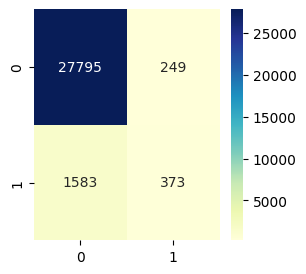

In [44]:
y_pred_gbc = pipeline_gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [45]:
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, pipeline_gbc.predict_proba(X_test)[:, 1])))


ROC AUC: 0.862


In [46]:
cr = classification_report(y_test, y_pred_gbc,target_names=["0","1"])
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.60      0.19      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.77      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



In [48]:
import pickle
model_file_path = 'gbc_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_gbc, model_file)

### Random Forest Classfier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators=100, min_samples_split=10, max_features=3, max_depth=3)

In [50]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': [2, 3, 4]
}

In [51]:
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', rf)  
])

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['RevolvingUtilizationOfUnsecuredLines',
                                                                          'age',
                                                                          'NumberOfTime30-59DaysPastDueNotWorse',
                                                                          'DebtRatio',
                                                                          'MonthlyIncome',
                                                                          'NumberOfOpenCreditLinesAndLoans',
                                                                          'NumberOfTimes90DaysLate',
                                                                          'Nu...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         [])])),
                                       ('model',
                                        RandomForestClassifier(max_depth=3,
                                                               max_features=3,
                                                               min_samples_split=10,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7, None],
                         'model__max_features': [2, 3, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [53]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'model__max_depth': 7, 'model__max_features': 4, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Best Accuracy: 0.9366666666666668


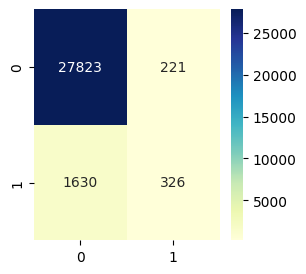

In [54]:
y_pred_rf = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [55]:
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])))


ROC AUC: 0.860


In [56]:
cr = classification_report(y_test, y_pred_gbc,target_names=["0","1"])
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.60      0.19      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.77      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



In [58]:
import pickle
model_file_path = 'rf_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(grid_search.best_estimator_, model_file)

#### Classes in our dataset are highly imbalanced and I propose to do undersampling and then training the model

In [59]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [60]:
grid_search.best_estimator_.fit(X_resampled,y_resampled)
y_pred_undersampled_rf=grid_search.best_estimator_.predict(X_test)

In [61]:
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])))


ROC AUC: 0.859


In [63]:
import pickle
model_file_path = 'rf_model_undersampled.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(grid_search.best_estimator_, model_file)

### KneighboursClassifier

Training Accuracy : 0.9422416666666666
Testing Accuracy : 0.9328


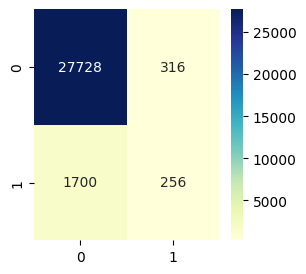

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     28044
           1       0.45      0.13      0.20      1956

    accuracy                           0.93     30000
   macro avg       0.69      0.56      0.58     30000
weighted avg       0.91      0.93      0.92     30000

ROC AUC: 0.684


In [64]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
pipeline_kn = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', kn)  
])
pipeline_kn.fit(X_train,y_train)
y_pred_kn = pipeline_kn.predict(X_test)

print("Training Accuracy :", pipeline_kn.score(X_train, y_train))
print("Testing Accuracy :", pipeline_kn.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred_kn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr = classification_report(y_test, y_pred_kn,target_names=["0","1"])
print(cr)
print("ROC AUC: {:.3f}".format(roc_auc_score(y_test, pipeline_kn.predict_proba(X_test)[:, 1])))

In [66]:
import pickle
model_file_path = 'knn_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline_kn, model_file)

In [67]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### Let's train Tensorflow model on gpu

In [68]:
import tensorflow as tf


2023-10-17 18:42:47.907022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 18:42:47.907117: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 18:42:47.908410: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 18:42:48.031815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.fit_transform(X_test)
X_train_processed.shape[1]

10

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=10),  
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(2, activation='softmax')  
])

2023-10-17 18:42:50.321347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:42:50.344499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:42:50.344566: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:42:50.346485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:42:50.346529: I tensorflow/compile

In [71]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  

In [72]:
model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test))

Epoch 1/10


2023-10-17 18:42:53.719407: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fae36bf88d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-17 18:42:53.719454: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-10-17 18:42:53.902452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


   1/3750 [..............................] - ETA: 2:47:06 - loss: 0.5508 - accuracy: 0.9375

2023-10-17 18:42:53.946925: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 [==============================] - 14s 3ms/step - loss: 0.2344 - accuracy: 0.9327 - val_loss: 0.2067 - val_accuracy: 0.9348
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2078 - accuracy: 0.9332 - val_loss: 0.1929 - val_accuracy: 0.9352
Epoch 3/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1993 - accuracy: 0.9342 - val_loss: 0.1893 - val_accuracy: 0.9359
Epoch 4/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1969 - accuracy: 0.9348 - val_loss: 0.1884 - val_accuracy: 0.9368
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1948 - accuracy: 0.9353 - val_loss: 0.1885 - val_accuracy: 0.9368
Epoch 6/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1939 - accuracy: 0.9355 - val_loss: 0.1875 - val_accuracy: 0.9371
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1928 - accuracy: 0.9354 - val_loss: 0.1866 - val_accuracy: 0.9

In [73]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.9347
Test accuracy: 0.9347333312034607


In [77]:
import pickle
model_file_path = 'tf_keras_sequential_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(model, model_file)